In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
import joblib


In [2]:
df = pd.read_csv("data.csv")
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.head()

,index,language,proj_id,file_id,file_body
0,0,JavaScript,10001,100001,// Functions as values of a variable\nvar cube...
1,1,JavaScript,10001,100002,// Functions as values of a variable\nvar cube...
2,2,JavaScript,10002,100003,function median(ary) {\n if (ary.length == ...
3,3,JavaScript,10002,100004,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n"
4,4,JavaScript,10002,100005,(() => {\n 'use strict';\n\n // median :...


In [3]:
print(df['language'].unique())

['JavaScript' 'Swift' 'Python' 'Java' 'C++' 'Ruby' 'Rust' 'C' 'Scala' 'R'
 'Go' 'Mathematica' 'Kotlin' 'Fortran' 'Julia' 'PHP' 'MATLAB' 'Haskell'
 'Perl']


In [4]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(df['file_body'])
converter = TfidfVectorizer()
tvectors = converter.fit_transform(df['file_body'])

In [5]:
tvectors.shape

(16268, 49528)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(tvectors, df['language'], test_size=0.30, random_state=42)
print("Shape of x_train is", x_train.shape, ",", "Shape of x_test is", x_test.shape)
print("Shape of y_train is", y_train.shape, ",", "Shape of y_test is", y_test.shape)

Shape of x_train is (11387, 49528) , Shape of x_test is (4881, 49528)
Shape of y_train is (11387,) , Shape of y_test is (4881,)


In [7]:
model = joblib.load("model.pkl")
model.fit(x_train, y_train)
preds = model.predict(x_test)
print("Model accuracy", model.score(x_test, y_test))
print(classification_report(y_test, preds))

Model accuracy 0.8690842040565457
              precision    recall  f1-score   support

           C       0.87      0.86      0.86       305
         C++       0.93      0.89      0.91       271
     Fortran       0.91      0.91      0.91       225
          Go       0.95      0.91      0.93       284
     Haskell       0.93      0.89      0.91       378
        Java       0.95      0.90      0.92       296
  JavaScript       0.86      0.89      0.87       330
       Julia       0.87      0.73      0.79       184
      Kotlin       0.99      0.98      0.98       184
      MATLAB       0.82      0.69      0.75       180
 Mathematica       0.57      0.83      0.67       286
         PHP       0.93      0.83      0.87       155
        Perl       0.85      0.90      0.87       334
      Python       0.87      0.89      0.88       421
           R       0.75      0.71      0.73       195
        Ruby       0.88      0.89      0.88       349
        Rust       0.98      0.96      0.97    

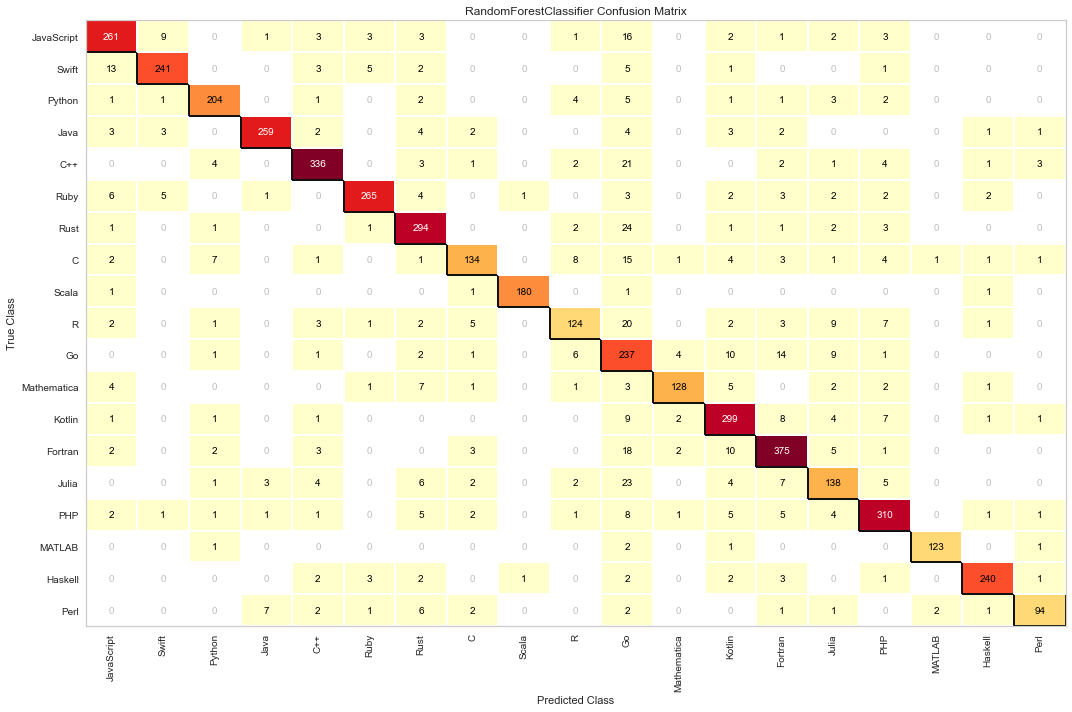

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
model_cm = ConfusionMatrix(model, classes=['JavaScript', 'Swift', 'Python', 'Java', 'C++', 'Ruby', 'Rust',
       'C', 'Scala', 'R', 'Go', 'Mathematica', 'Kotlin', 'Fortran',
       'Julia', 'PHP', 'MATLAB', 'Haskell', 'Perl'], size=(1080, 720))

model_cm.fit(x_train, y_train)
model_cm.score(x_test, y_test)
model_cm.show()

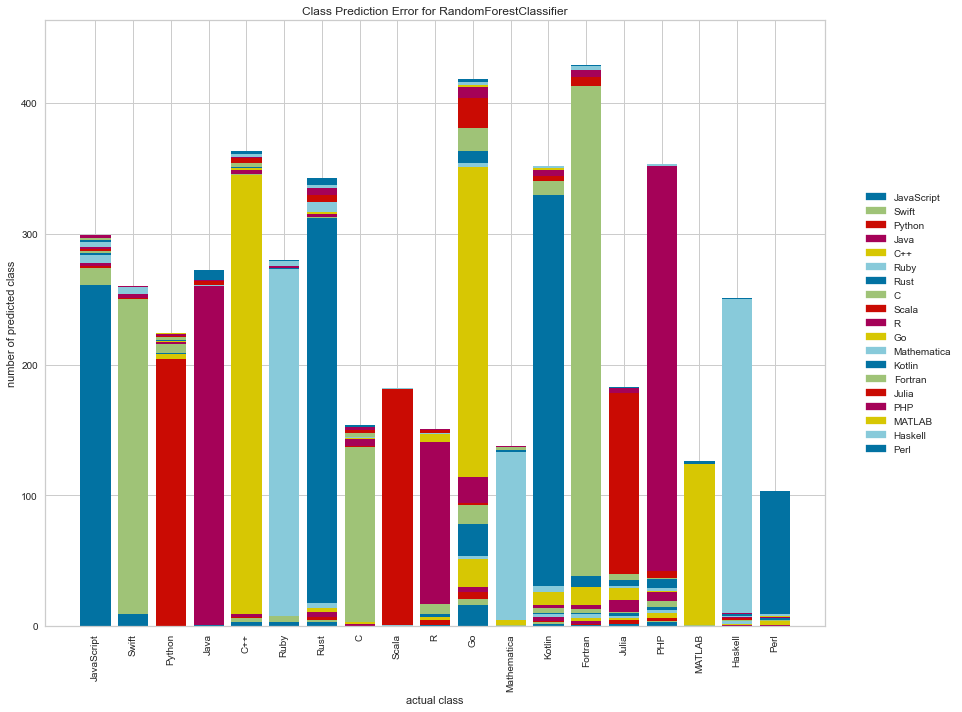

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [26]:
visualizer = ClassPredictionError(model, classes=['JavaScript', 'Swift', 'Python', 'Java', 'C++', 'Ruby', 'Rust',
       'C', 'Scala', 'R', 'Go', 'Mathematica', 'Kotlin', 'Fortran',
       'Julia', 'PHP', 'MATLAB', 'Haskell', 'Perl'], size=(1080, 720))

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()   

In [ ]:
new_sample = df.sample(1)
new_sample.to_csv('newer.csv')

In [ ]:
new_sample = df.sample(5)
new_sample.to_csv('newer3.csv')